# MEX 1: Exploring Linear Regression and Logistic Regression

By Juan Carlos Roldan and Jeryl Salas

## First subproblem: Energy Efficiency in Buildings

In this problem, we are building a regression model to help us predict two response variables (Heating Load and Cooling Load) given a set of 8 variables (Relative Compactness, Surface Area, Wall Area, Roof Area, Overall Height, Orientation, Glazing Area, Glazing Area Distribution).

This dataset can be retrieved from https://archive.ics.uci.edu/ml/datasets/Energy+efficiency.

In [17]:
pip install ucimlrepo pandas scikit-learn matplotlib

You should consider upgrading via the '/home/mobii/.pyenv/versions/3.7.10/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
import pprint

pp = pprint.PrettyPrinter(indent=4)
  
# fetch dataset 
energy_efficiency = fetch_ucirepo(id=242) 
  
# data (as pandas dataframes) 
X = energy_efficiency.data.features 
y = energy_efficiency.data.targets 
  
# metadata 
# pp.pprint(energy_efficiency.metadata)
  
# variable information 
pp.pprint(energy_efficiency.variables) 


  name     role        type demographic                description units  \
0   X1  Feature  Continuous        None       Relative Compactness  None   
1   X2  Feature  Continuous        None               Surface Area  None   
2   X3  Feature  Continuous        None                  Wall Area  None   
3   X4  Feature  Continuous        None                  Roof Area  None   
4   X5  Feature  Continuous        None             Overall Height  None   
5   X6  Feature     Integer        None                Orientation  None   
6   X7  Feature  Continuous        None               Glazing Area  None   
7   X8  Feature     Integer        None  Glazing Area Distribution  None   
8   Y1   Target  Continuous        None               Heating Load  None   
9   Y2   Target  Continuous        None               Cooling Load  None   

  missing_values  
0             no  
1             no  
2             no  
3             no  
4             no  
5             no  
6             no  
7          

In [3]:
# pp.pprint(energy_efficiency)
data = energy_efficiency['data']

X.columns = ['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area', 'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution']
y.columns = ['Heating Load', 'Cooling Load']

X.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [4]:
y.head()

,Heating Load,Cooling Load
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


In [5]:
from sklearn.model_selection import train_test_split

training_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-training_ratio, random_state=16)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio+validation_ratio), random_state=16)

print(f'Training set: {len(X_train)} items')
print(f'Validation set: {len(X_val)} items')
print(f'Test set: {len(X_test)} items')

Training set: 460 items
Validation set: 154 items
Test set: 154 items


In [6]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


alphas = 10 ** np.linspace(10, -2, 100) * 0.5
coefs = []
mses_val = []
scores_val = []
clfs = []


for a in alphas:
    ridge_clf = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(alpha=a))])
    ridge_clf = ridge_clf.fit(X_train.values, y_train.values)
    coefs.append(ridge_clf.named_steps['ridge'].coef_)

    pred = ridge_clf.predict(X_val.values)
    mses_val.append(mean_squared_error(y_val.values, pred))
    scores_val.append(ridge_clf.score(X_val.values, y_val.values))
    clfs.append(ridge_clf)

In [7]:

# Best performing classifier on test set
values_test = list(zip(coefs, mses_val, scores_val, clfs))
values_test.sort(reverse=True, key=lambda x: x[2])
# print(values_test[0][0], values_test[0][1], values_test[0][2])
# print(values_test)
clf = values_test[0][3]

pred = clf.predict(X_test.values)
mse = mean_squared_error(y_test.values, pred)
score = clf.score(X_test.values, y_test.values)
coef = clf.named_steps['ridge'].coef_

print(coef)

[[-4.0337051  -2.0127489   1.25379393 -2.58007088  7.73214981 -0.01322202
   2.64264455  0.23054784]
 [-4.66672699 -2.09091837  0.56248121 -2.31264328  8.17268074  0.08731915
   1.95468247  0.08226244]]


Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution'],
      dtype='object')


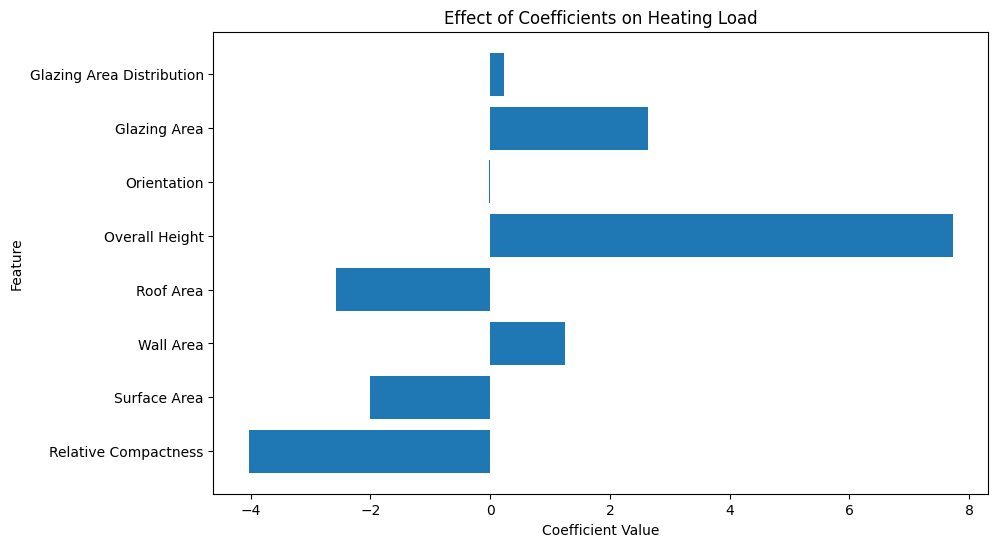

In [8]:
import matplotlib.pyplot as plt

absolute_coefficients = np.abs(coef)
feature_names = list(X.columns)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_names)), coef[0], align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Effect of Coefficients on Heating Load')
print(X.columns)
plt.show()

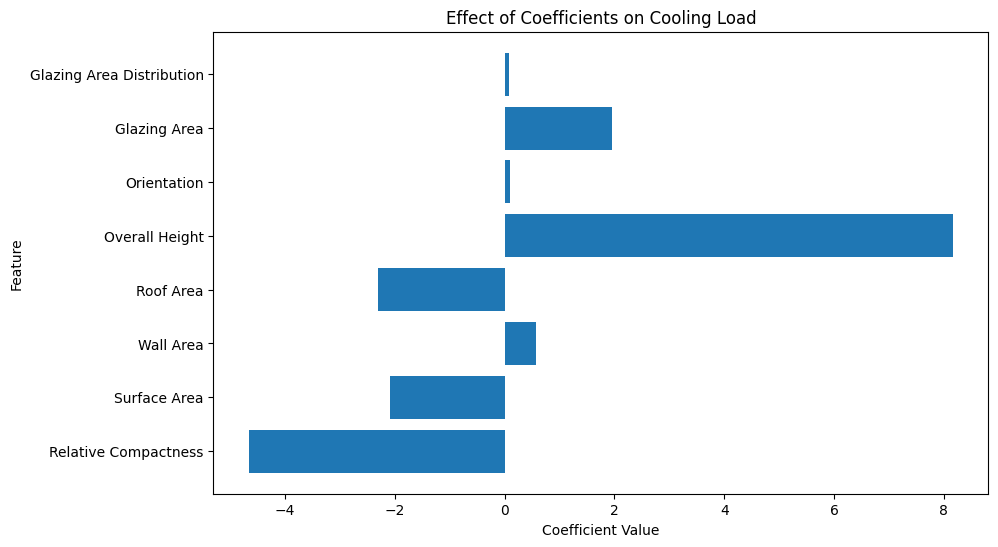

In [9]:
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_names)), coef[1], align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Effect of Coefficients on Cooling Load')
plt.show()

In [10]:
# Showing the top coefficients for each response variable
absolute_coefficients = np.abs(coef)
top_indices = [np.argsort(item)[::-1] for item in absolute_coefficients]

print("Top 5 features for Heating Load")
top_y1_x_columns = [X.columns[item] for item in top_indices[0][:5]]
print(top_y1_x_columns)

print("Top 5 features for Cooling Load")
top_y2_x_columns = [X.columns[item] for item in top_indices[1][:5]]
print(top_y2_x_columns)

Top 5 features for Heating Load
['Overall Height', 'Relative Compactness', 'Glazing Area', 'Roof Area', 'Surface Area']
Top 5 features for Cooling Load
['Overall Height', 'Relative Compactness', 'Roof Area', 'Surface Area', 'Glazing Area']


In [11]:
# Redoing the model on just the top 5 features.
coefs_y1 = []
mses_val_y1 = []
scores_val_y1 = []
clfs_y1 = []

coefs_y2 = []
mses_val_y2 = []
scores_val_y2 = []
clfs_y2 = []


for a in alphas: # using the same set of alphas as before
    # Training on y1, Heating Load
    ridge_clf = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(alpha=a))])
    ridge_clf = ridge_clf.fit(X_train[top_y1_x_columns].values, y_train['Heating Load'].values)
    coefs_y1.append(ridge_clf.named_steps['ridge'].coef_)

    pred = ridge_clf.predict(X_val[top_y1_x_columns].values)
    mses_val_y1.append(mean_squared_error(y_val['Heating Load'].values, pred))
    scores_val_y1.append(ridge_clf.score(X_val[top_y1_x_columns].values, y_val['Heating Load'].values))
    clfs_y1.append(ridge_clf)
    
    # Training on y2, Cooling Load
    ridge_clf = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(alpha=a))])
    ridge_clf = ridge_clf.fit(X_train[top_y2_x_columns].values, y_train['Cooling Load'].values)
    coefs_y2.append(ridge_clf.named_steps['ridge'].coef_)

    pred = ridge_clf.predict(X_val[top_y2_x_columns].values)
    mses_val_y2.append(mean_squared_error(y_val['Cooling Load'].values, pred))
    scores_val_y2.append(ridge_clf.score(X_val[top_y2_x_columns].values, y_val['Cooling Load'].values))
    clfs_y2.append(ridge_clf)

In [12]:
# Best performing classifier on test set for Y1 with top 5 features
values_test_y1 = list(zip(coefs_y1, mses_val_y1, scores_val_y1, clfs_y1))
values_test_y1.sort(reverse=True, key=lambda x: x[2])
clf_y1 = values_test_y1[0][3]

pred_y1 = clf_y1.predict(X_test[top_y1_x_columns].values)
mse_y1 = mean_squared_error(y_test['Heating Load'].values, pred)
score_y1 = clf_y1.score(X_test[top_y1_x_columns].values, y_test['Heating Load'].values)
coef_y1 = clf_y1.named_steps['ridge'].coef_

print("These are the coefficients for the reduced feature set (top 5 features) on the first response variable, Heating Load")
# Showing the top coefficients for each response variable
absolute_coefficients = np.abs(coef_y1)
top_indices = np.argsort(absolute_coefficients)[::-1]

new_top_y1_x_columns = [X[top_y1_x_columns].columns[item] for item in top_indices]
print(new_top_y1_x_columns)

These are the coefficients for the reduced feature set (top 5 features) on the first response variable, Heating Load
['Overall Height', 'Roof Area', 'Relative Compactness', 'Glazing Area', 'Surface Area']


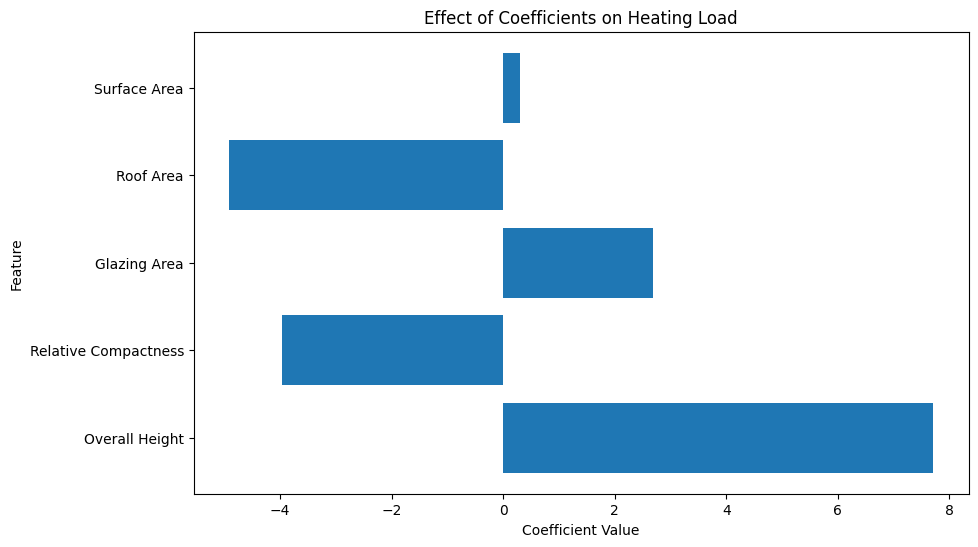

In [13]:
absolute_coefficients_y1 = np.abs(coef_y1)
feature_names_y1 = list(X[top_y1_x_columns].columns)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_names_y1)), coef_y1, align='center')
plt.yticks(np.arange(len(feature_names_y1)), feature_names_y1)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Effect of Coefficients on Heating Load')
plt.show()

In [14]:
# Best performing classifier on test set for Y1 with top 5 features
values_test_y2 = list(zip(coefs_y2, mses_val_y2, scores_val_y2, clfs_y2))
values_test_y2.sort(reverse=True, key=lambda x: x[2])
clf_y2 = values_test_y2[0][3]

pred_y2 = clf_y2.predict(X_test[top_y2_x_columns].values)
mse_y2 = mean_squared_error(y_test['Cooling Load'].values, pred)
score_y2 = clf_y2.score(X_test[top_y2_x_columns].values, y_test['Cooling Load'].values)
coef_y2 = clf_y2.named_steps['ridge'].coef_

# Showing the top coefficients for each response variable
print("These are the coefficients for the reduced feature set (top 5 features) on the second response variable, Cooling Load")
absolute_coefficients = np.abs(coef_y2)
top_indices = np.argsort(absolute_coefficients)[::-1]

new_top_y2_x_columns = [X[top_y2_x_columns].columns[item] for item in top_indices]
print(new_top_y2_x_columns)

These are the coefficients for the reduced feature set (top 5 features) on the second response variable, Cooling Load
['Overall Height', 'Relative Compactness', 'Roof Area', 'Glazing Area', 'Surface Area']


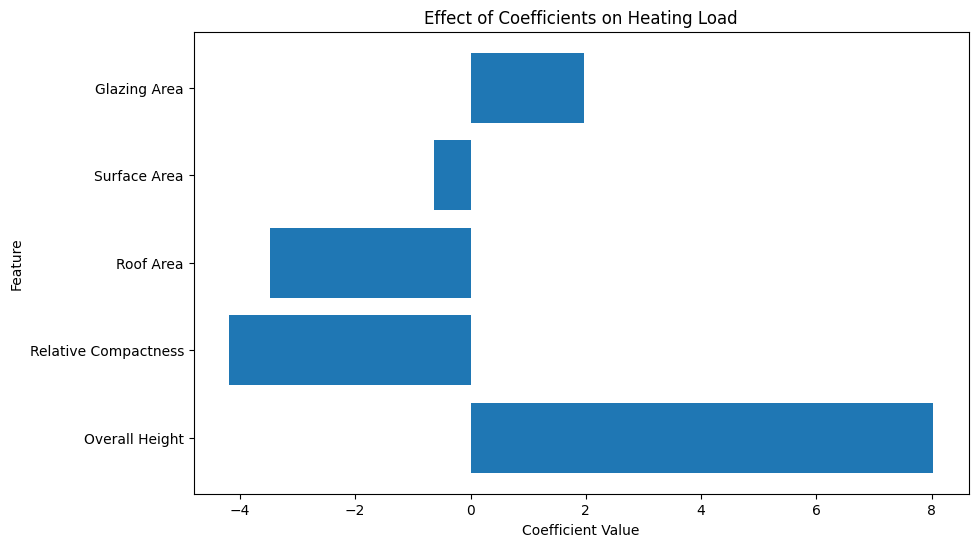

In [15]:
absolute_coefficients_y2 = np.abs(coef_y2)
feature_names_y2 = list(X[top_y2_x_columns].columns)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(feature_names_y2)), coef_y2, align='center')
plt.yticks(np.arange(len(feature_names_y2)), feature_names_y2)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Effect of Coefficients on Heating Load')
plt.show()